<a href="https://colab.research.google.com/github/Sharnitha1410/Bigmart-colab/blob/main/True_and_fake_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#True And Fake Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Mount Google Drive to the Colab environment at '/content/drive' for file access

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Test=pd.read_csv('/content/drive/MyDrive/DataSets/True and Fake News Prediction/test.csv')

In [4]:
Train=pd.read_csv('/content/drive/MyDrive/DataSets/True and Fake News Prediction/train.csv')

#Data Structure and Content

In [5]:
Train.shape

(20800, 5)

In [6]:
Test.shape

(5200, 4)

In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [9]:
Train.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [10]:
Test.isnull().sum()

,0
id,0
title,122
author,503
text,7


In [11]:
Train.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [12]:
Test.describe()

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [13]:
Train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
Test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


#Data preprocessing

1.Removing the null values

In [15]:
Train=Train.fillna('')

In [16]:
Train.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [17]:
Test=Test.fillna('')

In [18]:
Test.isnull().sum()

,0
id,0
title,0
author,0
text,0


In [19]:
Train['subject']=Train['author']+''+Train['title']

In [20]:
Train.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [21]:
Test['subject']=Test['author']+''+Test['title']

In [22]:
Test.head()

,id,title,author,text,subject
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David StreitfeldSpecter of Trump Loosens Tongu...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...


Tokenization

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
from nltk.tokenize import word_tokenize
Train['tokens']=Train['subject'].apply(word_tokenize)

In [25]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [26]:
from nltk.tokenize import word_tokenize
Test['tokens']=Test['subject'].apply(word_tokenize)

In [27]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David StreitfeldSpecter of Trump Loosens Tongu...,"[David, StreitfeldSpecter, of, Trump, Loosens,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...,"[Daniel, VictorTim, Tebow, Will, Attempt, Anot..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...,"[Truth, Broadcast, NetworkKeiser, Report, :, M..."


3.Lowercasing the text

In [28]:
Train['subject']= Train['subject'].str.lower()

In [29]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [30]:
Test['subject']= Test['subject'].str.lower()

In [31]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeldspecter of trump loosens tongu...,"[David, StreitfeldSpecter, of, Trump, Loosens,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warships ready to strike terrorists ne...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams#nodapl: native american leaders ...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victortim tebow will attempt another co...,"[Daniel, VictorTim, Tebow, Will, Attempt, Anot..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast networkkeiser report: meme war...,"[Truth, Broadcast, NetworkKeiser, Report, :, M..."


4.Removal of punctuations

In [32]:
Train['subject']=Train['subject'].str.replace('[^\w\s]','')

In [33]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [34]:
Test['subject']=Test['subject'].str.replace('[^\w\s]','')

In [35]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeldspecter of trump loosens tongu...,"[David, StreitfeldSpecter, of, Trump, Loosens,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warships ready to strike terrorists ne...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams#nodapl: native american leaders ...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victortim tebow will attempt another co...,"[Daniel, VictorTim, Tebow, Will, Attempt, Anot..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast networkkeiser report: meme war...,"[Truth, Broadcast, NetworkKeiser, Report, :, M..."


5.Removal of stop words

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
sw=set(nltk.corpus.stopwords.words('english'))
print(sw)

{"mustn't", 'wouldn', 'o', 'nor', 'doing', 'until', 'do', 'my', 'before', 'your', "you'd", 'should', "won't", 'few', "that'll", 'd', 'where', 'shouldn', 'this', 'here', 'once', 'through', 'ours', 'there', 'about', 'mightn', "wouldn't", 'won', 'was', "don't", 'too', 'were', 'will', 'don', 'a', 'yours', 'between', 'we', 'as', 'into', 'each', 'above', 'wasn', 'll', "shan't", 'to', 'both', 'shan', 'can', 'itself', 'theirs', 'me', 'yourself', 'such', 'at', 'you', 'by', 'am', 'haven', 'ma', 'more', 'm', 'if', 'herself', 'hers', 'weren', 'those', 'she', 'hasn', 'having', 'the', 'are', "aren't", 'ain', "shouldn't", 'had', 'why', 'over', 'being', 'of', 'aren', 'below', 'not', 'because', "should've", 'doesn', 'under', 'so', 'but', 'he', 've', "hasn't", 'own', "wasn't", 'for', 'him', 'while', 'has', 'or', 'how', 'in', 'most', 'these', 'them', 'does', 'they', 'it', 'y', 'up', 'any', 'very', 'needn', 'again', 'now', 'out', "weren't", 'against', 'further', 'whom', 're', 'on', 'who', 'is', 'off', 'an

In [38]:
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))


In [39]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: didn’t even see c...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy truth might get fired,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed single us a...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed fictional u...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [40]:
Test['subject'] = Test['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))

In [41]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","david streitfeldspecter trump loosens tongues,...","[David, StreitfeldSpecter, of, Trump, Loosens,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warships ready strike terrorists near ...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams#nodapl: native american leaders ...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victortim tebow attempt another comebac...,"[Daniel, VictorTim, Tebow, Will, Attempt, Anot..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast networkkeiser report: meme war...,"[Truth, Broadcast, NetworkKeiser, Report, :, M..."


6.Stemming or limitaisation

In [42]:
from nltk.stem import PorterStemmer

In [43]:
#To Apply Stemming or Lemmatization :
stemmer = PorterStemmer()
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [44]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucushous dem aide: didn’t even see com...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillari clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhi truth might get fire,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilian kill singl us airst...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jail fiction unpub...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [45]:
#To Apply Stemming or Lemmatization :
stemmer = PorterStemmer()
Test['subject'] = Test['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [46]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","david streitfeldspect trump loosen tongues, pu...","[David, StreitfeldSpecter, of, Trump, Loosens,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship readi strike terrorist near al...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams#nodapl: nativ american leader vo...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","daniel victortim tebow attempt anoth comeback,...","[Daniel, VictorTim, Tebow, Will, Attempt, Anot..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast networkkeis report: meme war (...,"[Truth, Broadcast, NetworkKeiser, Report, :, M..."


#Vectorization

In [47]:
x=Train['subject']
y=Train['label']


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
Vt=TfidfVectorizer()
Vt.fit(x)


TfidfVectorizer()

In [50]:
x.head()


,subject
0,darrel lucushous dem aide: didn’t even see com...
1,"daniel j. flynnflynn: hillari clinton, big wom..."
2,consortiumnews.comwhi truth might get fire
3,jessica purkiss15 civilian kill singl us airst...
4,howard portnoyiranian woman jail fiction unpub...


In [51]:
x=Vt.transform(x)


In [52]:
print(x)



  (0, 30011)	0.2702317405535354
  (0, 25953)	0.23633175774140575
  (0, 17287)	0.39616172821890755
  (0, 16772)	0.2687730240968852
  (0, 14864)	0.2267902704938032
  (0, 9503)	0.2131010345817379
  (0, 7770)	0.2725285388588018
  (0, 7469)	0.26535031144709154
  (0, 7127)	0.3269077189450684
  (0, 5991)	0.22776883917952795
  (0, 5117)	0.3339547020931297
  (0, 1090)	0.36074580999296135
  (1, 31859)	0.36688013213305515
  (1, 13172)	0.2508638367430399
  (1, 10395)	0.5226747357728401
  (1, 7068)	0.31638169487081524
  (1, 5725)	0.23248708292981804
  (1, 4720)	0.464055696418436
  (1, 4070)	0.18539331285820687
  (1, 3346)	0.35413476846519715
  (2, 29899)	0.36635739112785753
  (2, 18743)	0.4315491786494108
  (2, 11172)	0.3064339824029749
  (2, 10169)	0.3472323577842834
  (2, 6291)	0.404084133229652
  :	:
  (20797, 28830)	0.3162590151970751
  (20797, 25250)	0.2481398859255049
  (20797, 23768)	0.2719892730679363
  (20797, 23448)	0.24910787789148428
  (20797, 20003)	0.08061747005948777
  (20797, 18695)

In [53]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [54]:
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [55]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [56]:
Modal=LogisticRegression()

In [57]:
Modal.fit(xTrain,yTrain)

LogisticRegression()

In [58]:
ytrpredict=Modal.predict(xTrain)

In [59]:
accuracy =accuracy_score(yTrain,ytrpredict)
precision = precision_score(yTrain, ytrpredict)
recall = recall_score(yTrain, ytrpredict)
f1 = f1_score(yTrain, ytrpredict)

print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:', f1)




 Training Accuracy: 0.971875
 Training Precision: 0.9519429753966429
 Training Recall: 0.9939975990396158
Training F1 Score: 0.9725158562367864


In [60]:
Yttpredict=Modal.predict(xTest)

In [61]:
accuracy  =accuracy_score(yTest,Yttpredict)
precision = precision_score(yTest, Yttpredict)
recall = recall_score(yTest, Yttpredict)
f1 = f1_score(yTest, Yttpredict)

print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:', f1)


 Testing Accuracy: 0.9504807692307692
 Testing Precision: 0.9180400890868596
 Testing Recall: 0.9894383101296207
Testing F1 Score: 0.9524029574861367


In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


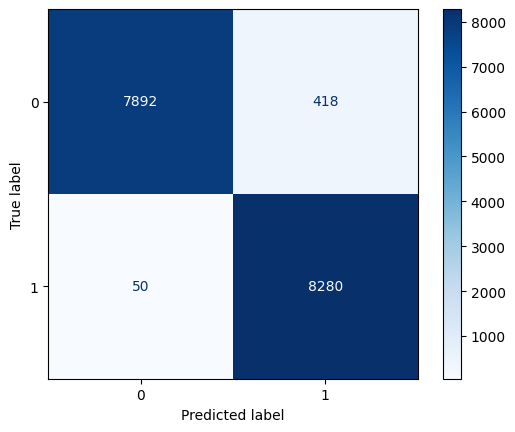

In [63]:
# Generate the confusion matrix
cm = confusion_matrix(yTrain,ytrpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()



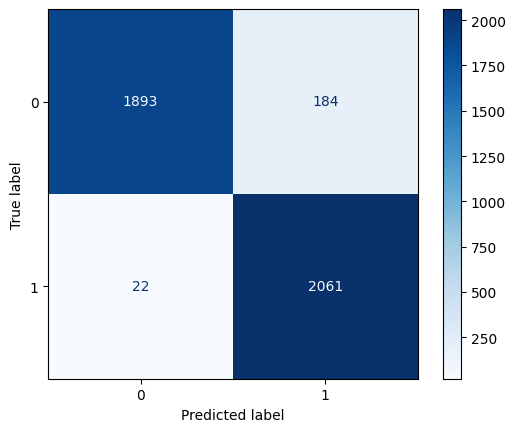

In [64]:
#Generate the confusion matrix
cm = confusion_matrix(yTest,Yttpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

#To save the Model

In [65]:
import pickle